In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data_v10_stability = pd.read_csv("../../experiments/noise_spike_recovery-diffusion-rocstories-16-d=5-v1.0.csv", index_col=0)
data_v11_stability = pd.read_csv("../../experiments/noise_spike_recovery-diffusion-rocstories-16-d=5-v2.3.4.csv", index_col=0)

In [3]:
data_v10_stability.index.name = 'std'
data_v11_stability.index.name = 'std'

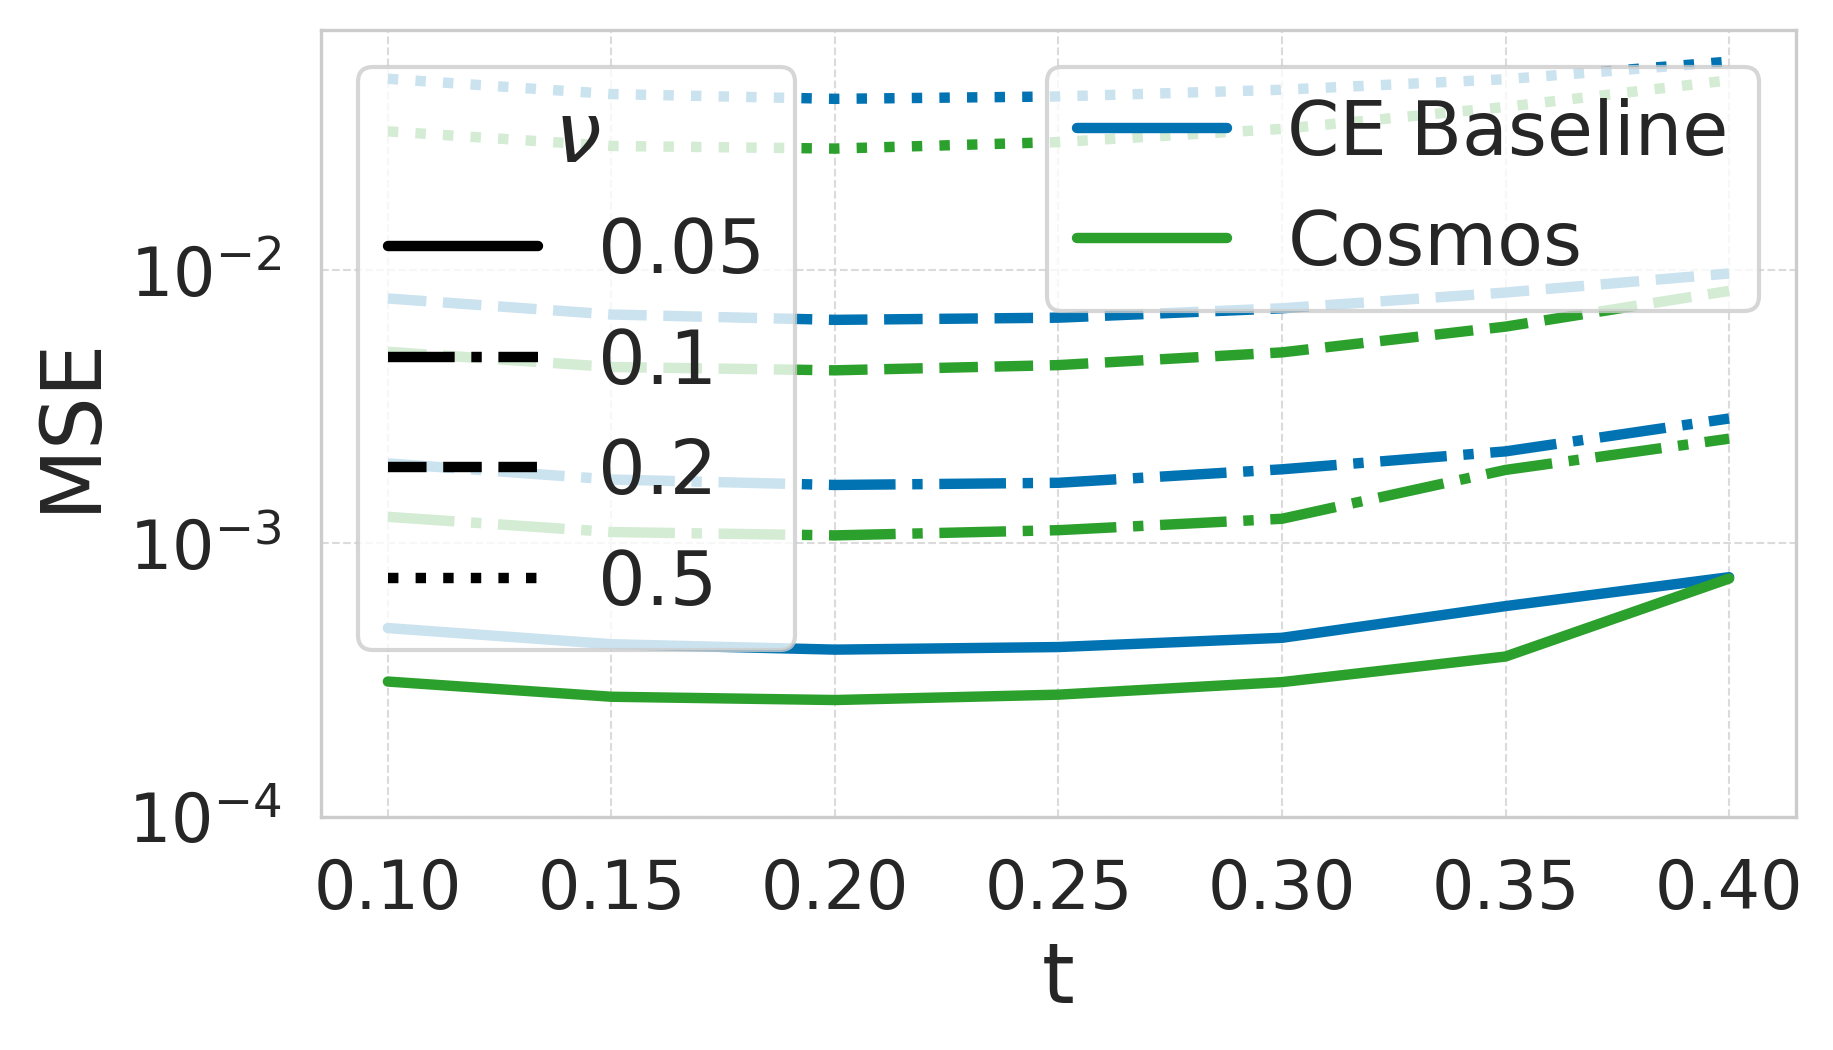

In [4]:
# In the cell where you do the plotting, replace everything with:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.lines import Line2D

# 1. Global styling (match plot3)
sns.set_theme(style="whitegrid")
mpl.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
    'font.size': 20,
    'axes.labelsize': 20,
    'axes.titlesize': 20,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 18,
    'axes.linewidth': 0.8,
    'grid.linewidth': 0.5,
    'lines.linewidth': 2.5,
    'figure.dpi': 300,
})

# 2. Load and prepare data
data_v10 = pd.read_csv(
    "../../experiments/noise_spike_recovery-diffusion-rocstories-16-d=5-v1.0.csv",
    index_col=0
)
data_v11 = pd.read_csv(
    "../../experiments/noise_spike_recovery-diffusion-rocstories-16-d=5-v2.3.4.csv",
    index_col=0
)
for df in (data_v10, data_v11):
    df.index.name = 'std'

# Melt to long form and filter
df_v10 = data_v10.reset_index().melt(id_vars='std', var_name='t', value_name='MSE')
df_v11 = data_v11.reset_index().melt(id_vars='std', var_name='t', value_name='MSE')
df_v10['t'] = df_v10['t'].astype(float)
df_v11['t'] = df_v11['t'].astype(float)
df_v10 = df_v10[df_v10['t'] <= 0.4]
df_v11 = df_v11[df_v11['t'] <= 0.4]

# 3. Define version‐colors and linestyles (one style per σ)
blue  = '#0173b2'  # v1.0
green = '#2ca02c'  # v1.1
linestyles = [
    '-', '-.', '--', ':',
    (0, (1, 1)), (0, (5, 1)), (0, (3, 1, 1, 1)),
    (0, (5, 5)), (0, (3, 5, 1, 5)), (0, (1, 5))
]

# 4. Plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
std_levels = sorted(data_v11.index.astype(float))

for i, std in enumerate(std_levels):
    style = linestyles[i % len(linestyles)]
    # v1.0 → blue line, no legend entry
    sub10 = df_v10[df_v10['std'] == std]
    ax.plot(sub10['t'], sub10['MSE'],
            color=blue, linestyle=style, label=None)
    # v1.1 → green line, label once for σ legend
    sub11 = df_v11[df_v11['std'] == std]
    ax.plot(sub11['t'], sub11['MSE'],
            color=green, linestyle=style, label=str(std))

# 5. Build legends
legend_std = ax.legend(title='$\\nu$',
                       title_fontsize=20,
                       loc='upper left',
                       frameon=True)
# make σ‐legend lines black
for handle in legend_std.get_lines():
    handle.set_color('black')

version_handles = [
    Line2D([0], [0], color=blue,  linestyle='-', label='CE Baseline'),
    Line2D([0], [0], color=green, linestyle='-', label='Cosmos'),
]
legend_version = ax.legend(handles=version_handles,
                        #    title='Configuration',
                           title_fontsize=20,
                           loc='upper right',
                           frameon=True)
ax.add_artist(legend_std)

# 6. Final formatting
ax.set_xlabel("t")
ax.set_ylabel("MSE")
ax.set_yscale('log')
ax.set_ylim(bottom=1e-4)

# 7. Grid style (match plot3)
ax.grid(True, which='major', linestyle='--', alpha=0.7)

# 8. Save & show
plt.tight_layout()
width_px, height_px = 3500, 2000
save_dpi = 600
plt.gcf().set_size_inches(width_px / save_dpi, height_px / save_dpi)
plt.savefig("./diffusion_robustness.pdf", dpi=600, bbox_inches='tight')
plt.show()